In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Display the first few rows to check the data
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check for missing values in the dataset
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [3]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Split features and target variable
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = df['Outcome']  # Target column


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training data:", X_train.shape)
print("Test data:", X_test.shape)


Training data: (614, 8)
Test data: (154, 8)


Accuracy (SVM): 0.7532
ROC AUC (SVM): 0.7313


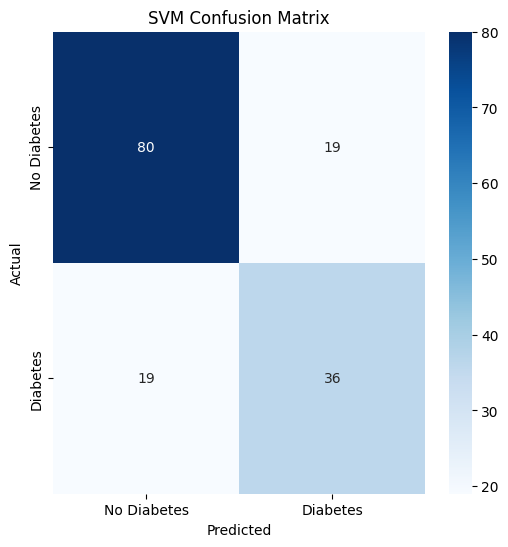

In [10]:
from sklearn.svm import SVC

# Initialize the SVM model (you can adjust the kernel type, here we use 'linear')
svm_model = SVC(kernel='linear', random_state=42,probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print(f"ROC AUC (SVM): {roc_auc_svm:.4f}")

# Plot Confusion Matrix for SVM
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


In [11]:
import joblib

# Define the path where you want to save the model
drive_path = '/content/drive/MyDrive/DIEBETES PREDICTION/diabetes_model_svm.pkl'

# Save the model to Google Drive
joblib.dump(svm_model, drive_path)

print(f"Model saved to: {drive_path}")


Model saved to: /content/drive/MyDrive/DIEBETES PREDICTION/diabetes_model_svm.pkl
